In [97]:
from selenium import webdriver
import pandas as pd
from pathlib import Path
import glob, os

#url = 'http://www.kric.go.kr/jsp/industry/rss/citystapassList.jsp'
year = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# http://www.kric.go.kr/jsp/industry/rss/citystapassList.jsp?q_org_cd=A010010021&q_fdate=2019 서울 메트로
# http://www.kric.go.kr/jsp/industry/rss/citystapassList.jsp?q_org_cd=A010010022&q_fdate=2019 #도시철도공사

url = "https://uri.seoul.go.kr/surc/archive/statsReportSummaryView.do?bbs_seq=26&bbs_master_seq=SUMMARY&title=서울시+지하철+호선별+역별+시간대별+승하차+인원+정보&ccl_se=60&defaultSearch=201907"

In [ ]:


def kric_crawling(url):
    driver_path = 'C:\\Users\\15Z970-GA5BK\\Downloads\\chromedriver.exe'
    driver = webdriver.Chrome(driver_path)
    file_name = []
    #for y in year:
    #    for m in month:
            
            #new_url = 'http://www.kric.go.kr/jsp/industry/rss/citytimepassList.jsp?q_fdate={}&q_month={}'.format(y, m)
            #driver.get(new_url)
            #dl_excel_btn = driver.find_element_by_xpath('//*[@id="ContentS"]/div[3]/div/a[2]/img').click()
    for m in month[:8]:
        new_url = "https://uri.seoul.go.kr/surc/archive/statsReportSummaryView.do?bbs_seq=26&bbs_master_seq=SUMMARY&title=서울시+지하철+호선별+역별+시간대별+승하차+인원+정보&ccl_se=60&defaultSearch={}".format("20190"+str(m))
        driver.get(new_url)
        dl_excel_btn = driver.find_element_by_xpath('//*[@id="excel_download"]').click()

            
            



In [ ]:

def rename_by_createddate():
    path = '/Users/15Z970-GA5BK/Downloads/xyz'
    x = 1
    c_date = []
    for y in year[-1]:
        for m in month:
            c_date.append(str(y) + "_" + str(m))
            
    files = sorted(os.listdir(path),key=os.path.getctime); 
    for i, file in enumerate(files):    
        
        if file.startswith('rename'):                                                                       
            continue;
        os.rename(file, "시간대별수송인원(월)" + "_" + c_date[i] + ".xls");                                                             

In [ ]:
kric_crawling(url)

In [ ]:
rename_by_createddate()

# 데이터 탐구

In [2]:
pd.set_option('display.max_columns', 500)
os.chdir("/Users/15Z970-GA5BK/Downloads/seoul_metro_station_hourly")
df = pd.read_excel('서울교통공사 2018년 일별 역별 시간대별 승하차인원(1_8호선).xlsx')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,(단위:명)
0,날짜,호선,역번호,역명,구분,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,14 ~ 15,15 ~ 16,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,합 계
1,2018-01-01 00:00:00,1호선,150,서울역,승차,373,318,365,785,1047,1576,2510,3233,3145,2443,2980,3476,3891,3227,2945,2382,3070,1750,781,96,40393
2,2018-01-01 00:00:00,1호선,150,서울역,하차,205,1040,872,984,1650,1743,2175,2991,2877,2743,2687,2885,2845,2337,2131,1669,1404,868,477,147,34730
3,2018-01-01 00:00:00,1호선,151,시청,승차,87,105,124,197,291,499,722,612,580,821,907,1027,1102,1278,1163,1032,975,553,214,9,12298
4,2018-01-01 00:00:00,1호선,151,시청,하차,47,294,497,1017,673,657,820,958,1009,877,830,781,702,552,388,308,236,160,100,39,10945
5,2018-01-01 00:00:00,1호선,152,종각,승차,604,399,191,250,370,439,705,980,1153,1392,1710,2127,2172,2171,1873,1935,2084,1458,580,28,22621
6,2018-01-01 00:00:00,1호선,152,종각,하차,74,219,327,606,989,1086,1356,1815,1822,1807,1698,1538,1403,1211,722,420,342,186,152,33,17806
7,2018-01-01 00:00:00,1호선,153,종로3가,승차,282,211,133,233,320,471,763,1075,1256,1546,1742,1962,1984,1620,1430,1206,1213,922,313,16,18698
8,2018-01-01 00:00:00,1호선,153,종로3가,하차,48,128,165,348,750,947,1440,1863,2123,2039,1617,1309,970,814,462,322,264,165,139,35,15948
9,2018-01-01 00:00:00,1호선,154,종로5가,승차,54,61,78,146,221,330,556,765,1030,1146,1128,1026,1061,991,773,505,402,296,85,8,10662


In [3]:
os.chdir("/Users/15Z970-GA5BK/Downloads/seoul_metro_station_hourly")
df1 = pd.read_csv('서울교통공사 2016년 일별 역별 시간대별 승하차인원(1_8호선).csv', engine ='python')
df1.head()

,날짜,역번호,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,12~13,13~14,14~15,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,24~
0,2016-01-01,150,서울역(150),하차,342,"1,637","1,753","1,856","2,438","2,425","2,548","2,718","2,973","2,921","3,341","3,108","2,656","2,134","1,859","1,394","1,344","1,056",612,222
1,2016-01-01,150,서울역(150),승차,469,339,584,"1,144","1,723","2,087","2,983","3,527","3,386","2,612","3,639","3,554","3,200","3,076","2,519","2,281","2,398","2,056",996,58
2,2016-01-01,151,시청(151),하차,68,306,554,939,689,665,884,956,"1,084","1,216","1,033","1,035",951,792,618,402,309,192,114,34
3,2016-01-01,151,시청(151),승차,103,127,110,191,298,582,700,604,731,900,"1,069","1,339","1,458","1,499","1,383","1,284","1,198",675,375,9
4,2016-01-01,152,종각(152),승차,702,341,234,296,335,419,733,865,991,"1,300","1,772","2,175","2,580","2,627","2,302","2,315","2,365","2,140","1,117",51


In [4]:
df_excel = pd.read_excel('서울교통공사 2017년 일별 역별 시간대별 승하차인원(1_8호선).xlsx')


In [5]:
df_excel.loc[0]

Unnamed: 0          날짜
Unnamed: 1          구분
Unnamed: 2          호선
Unnamed: 3         역번호
Unnamed: 4          역명
Unnamed: 5          구분
Unnamed: 6       05~06
Unnamed: 7       06~07
Unnamed: 8       07~08
Unnamed: 9       08~09
Unnamed: 10      09~10
Unnamed: 11      10~11
Unnamed: 12      11~12
Unnamed: 13      12~13
Unnamed: 14      13~14
Unnamed: 15      14~15
Unnamed: 16      15~16
Unnamed: 17      16~17
Unnamed: 18      17~18
Unnamed: 19      18~19
Unnamed: 20      19~20
Unnamed: 21      20~21
Unnamed: 22      21~22
Unnamed: 23      22~23
Unnamed: 24      23~24
Unnamed: 25    00 ~ 01
(단위:명)             합 계
Name: 0, dtype: object

In [6]:
df2 = pd.read_excel('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보(전체) (2).xls')

columns = df2.iloc[0, :]
df2.columns = columns
df2.drop([0,1], inplace=True)
df2


,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
2,201901,1호선,서울역,927,22,10682,8774,13504,45545,39110,103863,80492,236747,61108,163026,68446,86198,89100,80051,98021,85869,101282,91792,86627,86386,113919,87211,118223,91594,161216,98032,249973,105075,142575,77807,97729,55056,96955,46680,70982,35481,33149,19442,3612,7167,0,410,0,0,0,0,20190203
3,201901,1호선,시청,74,0,2409,4049,3532,19241,7703,66876,9978,209349,12818,88793,16470,49343,22512,45645,26040,41405,34728,46800,40497,40429,51586,34787,54591,29029,80258,28534,170225,28331,76142,15634,57394,9141,58745,8204,38156,6345,14478,4079,981,1256,3,29,0,0,0,0,20190203
4,201901,1호선,종각,100,8,4409,5105,4593,26969,6733,104259,11028,300081,14563,167611,20165,80474,34617,76633,42088,71920,59893,75678,68149,62408,84211,57607,96197,55889,144446,63459,257735,83206,134259,51603,113555,19039,135586,12188,111743,8286,54264,5560,4886,1722,0,0,0,0,0,0,20190203
5,201901,1호선,종로3가,122,4,5061,2520,3876,12832,6066,29381,9735,84155,14261,100477,24063,87040,42723,96552,58902,101213,76615,103649,81392,88983,94128,72249,105094,61092,107194,56484,129847,62455,95225,37346,68613,14242,76067,10422,62004,7761,25970,5503,3214,2471,0,52,0,0,0,0,20190203
6,201901,1호선,종로5가,43,2,1934,3590,2935,14991,5143,40376,8509,132808,12652,78635,20434,62671,31918,69919,45533,72651,60255,69005,69651,63201,74447,54752,77646,48878,93779,42973,133826,40675,72550,24744,49690,10816,40800,7410,32727,5112,12013,3450,785,980,1,3,0,0,0,0,20190203
7,201901,1호선,동대문,621,7,15328,2164,10315,6673,14893,12227,24080,27692,23381,28386,20712,29569,22747,35954,28260,38658,31402,38011,34392,35395,34450,33461,34186,29483,34722,29805,33085,29970,22672,31274,18241,21650,16317,16942,13782,16009,7712,13475,1071,4691,3,35,0,0,0,0,20190203
8,201901,1호선,신설동,287,18,8847,2242,9805,8507,20077,23708,30505,77052,21746,42215,19219,26352,23432,24639,25947,24205,28510,25266,28537,24194,30381,24152,32723,23766,43942,28965,74303,31156,31339,25953,19997,16735,17833,15825,13174,15675,5830,10702,593,2638,0,16,0,0,0,0,20190203
9,201901,1호선,제기동,316,8,4874,2284,8388,8242,22615,18537,34862,50424,24786,43146,27130,46347,38424,63325,49342,71837,58332,79114,66681,70456,75677,58388,72189,40292,58939,32726,54182,29402,27310,24217,18230,14579,12731,12853,9087,12449,3758,8308,258,1890,0,0,0,0,0,0,20190203
10,201901,1호선,청량리(서울시립대입구),1321,11,10844,2912,16911,12013,46015,20676,65427,42910,42110,41090,35796,41999,43937,55752,53733,64244,55751,73268,63486,72150,70997,65918,75642,56026,68623,57290,57624,65469,35155,53706,27840,31541,21510,28397,15223,29237,7191,19427,441,6495,0,0,0,0,0,0,20190203
11,201901,1호선,동묘앞,93,3,3326,832,3418,3433,6088,8945,9415,22873,8843,17002,9745,19744,14192,28601,20731,35160,27534,40084,36068,40068,41458,33617,40873,23502,37880,16292,28274,11369,12349,8521,7475,6051,6022,5914,4480,6355,2215,4516,235,3138,2,242,1,0,0,0,20190203


# load_allfiles()는 수정 필요. 실행 안됨

In [3]:

def load_allfiles():
    pd.set_option('display.max_columns', 500)
    os.chdir("/Users/15Z970-GA5BK/Downloads/seoul_metro_station_hourly")
    result_csv = pd.DataFrame([])
    result_xlsx = pd.DataFrame([])
    result_xls = pd.DataFrame([])
    count = 0
    #서울열린데이터광장
    for counter, file in enumerate(glob.glob("서울교통공사*")):
        print(file)
        if 'csv' in file:
            df_csv = pd.read_csv(file, engine = 'python')
            if count == 1:
                columns = df_excel.iloc[1, :]
                df_excel.columns = columns
                df_excel.drop([0,1], inplace = True)
                df_excel = df_excel.iloc[:-2]
                result_csv = result_csv.append(df_csv)
                count = 0
            
            if count == 0:
                try:
                    df_excel.drop([0,1], inplace = True)
                    df_excel = df_excel.iloc[:-2]
                    result_csv = result_csv.append(df_csv)
                except:
                    continue 

        else:
            df_excel = pd.read_excel(file)
        
            try:
                columns = df_csv.iloc[1, :]
                df_csv.columns = columns
                df_csv.drop([0,1,2], inplace = True)
                df_csv = df_csv.iloc[:-2]
                result_xlsx = result_xlsx.append(df_excel)
            except:
                continue

    #서울도시재생포털2019
    for counter, file2 in enumerate(glob.glob('서울시 지하철*')):
        print(file2)
        df_excel = pd.read_excel(file2)
        columns = df_excel.iloc[1, :]
        df_excel.columns = columns
        df_excel.drop([0,1], inplace = True)
        df_excel = df_excel.iloc[:-2]
        results_xls = result_xls.append(df_excel)
        
        
    return result_csv, result_xlsx, result_xls

df1, df2, df3 = load_allfiles()

서울교통공사 2012년 일별 역별 시간대별 승하차인원(1_8호선).csv
서울교통공사 2013년 일별 역별 시간대별 승하차인원(1_8호선).csv


KeyboardInterrupt: 

### 파일 확장자 별로 전처리 다르게 해야함.

In [ ]:
result_xls = pd.DataFrame([])
for counter, file2 in enumerate(glob.glob('서울시 지하철*')):
    print(file2)
    df_excel = pd.read_excel(file2)
    columns = df_excel.iloc[1, :]
    #df_excel.columns = columns
    #df_excel.drop([0,1], inplace = True)
    df_excel = df_excel.iloc[:-2]
    result_xls = result_xls.append(df_excel)


In [ ]:
result_xls.head()

In [ ]:
column = result_xls.iloc[0]
result_xls.columns = column
result_xls.drop(0, inplace = True)


In [ ]:
column = result_xls.columns
column[3:-1]
result_xls[column[3:-1]] = result_xls[column[3:-1]].astype('int')

In [ ]:
result_xls.sum(axis=1)

In [ ]:
results = load_allfiles()

In [ ]:
df2

In [ ]:
results

# 전처리 과정

In [ ]:
def preprocessing(df):
    #합계'가 있는 데이터 제거
    df = df[df["시간구분/기관"].str.contains('합') ==False]
    #시간구분에서 '시간대'제거
    df['시간구분/기관'] = df['시간구분/기관'].apply(lambda x: x.split('시')[0])
    
    #인덱스 리셋
    df = df.reset_index()
    #인덱스 리셋 후 첫번째 컬럼 삭제
    df.drop(df.columns[0], axis = 1, inplace = True)
    
    #모든 컬럼 int형으로 데이터타입 변환
    column_names = df.columns
    
    #연월/시간대를 제외하고 모두 int형으로 데이터타입 변환
    column_to_int = df.columns[2:]
    df[column_to_int] = df[column_to_int].astype(int)
    return df


# 파일별로 데이터포맷이 다르기 때문에 각기 다른 방식을 전처리

## 2019년 데이터 전처리

In [7]:
df_2019 = pd.read_excel('서울시지하철201901~08.xlsx')

In [8]:
df_2019['사용월'] = pd.to_datetime(df_2019['사용월'], format='%Y%m')
df_2019['사용월'] = df_2019['사용월'].apply(lambda x: x.strftime('%Y%m'))
df_2019['호선명'] = df_2019['호선명'].apply(lambda x: x.replace('호선', ''))
df_2019['구분'] = 1

import re

승차컬럼 = ['사용월', '호선명', '지하철역', '구분', '05시-06시 승차인원', '06시-07시 승차인원', '07시-08시 승차인원', '08시-09시 승차인원', '09시-10시 승차인원', '10시-11시 승차인원', '11시-12시 승차인원', '12시-13시 승차인원', '13시-14시 승차인원', '14시-15시 승차인원', '15시-16시 승차인원', '16시-17시 승차인원', '17시-18시 승차인원', '18시-19시 승차인원', '19시-20시 승차인원', '20시-21시 승차인원', '21시-22시 승차인원','22시-23시 승차인원','23시-24시 승차인원','00시-01시 승차인원']
df_2019_승차 = df_2019[승차컬럼]
하차컬럼 = [c.replace('승차', '하차') for c in 승차컬럼]
df_2019_하차 = df_2019[하차컬럼]
df_2019[하차컬럼]['구분'] = 0

column = df_2019_승차.columns
column = column[4:]
column = [re.sub('[^0-9]', '', c) for c in column]

rest_c = ['구분', '지하철역', '호선명', '사용월']
for r in rest_c:
    
    column.insert(0, r)
    
    
df_2019_승차.columns = column
df_2019_하차.columns = column
df_2019_하차['구분'] = 0

df_2019_merged = pd.concat([df_2019_승차, df_2019_하차], ignore_index = True)

df_2019_merged

C:\Users\15Z970-GA5BK\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\15Z970-GA5BK\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,사용월,호선명,지하철역,구분,0506,0607,0708,0809,0910,1011,1112,1213,1314,1415,1516,1617,1718,1819,1920,2021,2122,2223,2324,0001
0,201902,1,서울역,1,8555,11397,33119,69853,55331,63035,83092,91949,93113,80670,107667,109625,141158,205007,125025,87107,87505,66234,31162,4321
1,201902,1,시청,1,2142,3110,6558,8534,11848,14589,19467,22117,27264,34558,43956,49338,67101,130326,61236,46584,46362,30702,11847,743
2,201902,1,종각,1,3657,3764,5787,9678,12738,17814,29085,36843,50815,58292,73337,85787,120164,203256,111309,94025,110158,91859,44516,3822
3,201902,1,종로3가,1,4306,3433,5119,8393,12761,21648,35077,47681,61811,70434,80664,90490,92667,109038,80842,59962,64126,53059,23323,2546
4,201902,1,종로5가,1,1596,2663,4409,7405,11442,18636,28045,38885,51471,60908,64785,67145,77924,109392,62401,43052,34780,27346,9572,668
5,201902,1,동대문,1,12039,8680,12851,19452,19369,18299,20850,25305,29725,32265,32732,32531,32090,30660,21614,16749,15664,13557,7429,1041
6,201902,1,신설동,1,7713,8352,16631,24552,18912,18226,20213,22361,24803,25176,26804,28843,36189,59654,27064,17358,15299,11214,5426,612
7,201902,1,제기동,1,3909,6885,18154,27910,20749,22856,29984,38034,43798,47970,52860,52471,46318,45509,24315,15637,11230,7814,3412,278
8,201902,1,청량리(서울시립대입구),1,9271,13805,37174,52946,35909,32008,38396,45154,47442,52386,59623,63522,58584,51895,31981,25241,19261,13665,6387,395
9,201902,1,동묘앞,1,2812,2841,5242,7741,7820,9249,13486,19479,26384,34577,40514,41503,37567,29252,12080,6375,5616,4349,2061,277


In [9]:
columns = df_2019_merged.columns

# 2019년 데이터 포맷에 맞게 2017~2018 전처리

In [10]:
df_20178 = pd.read_excel('서울교통공사 2017-2018.xlsx')
import datetime as dt

df_20178['날짜'] = pd.to_datetime(df_20178['날짜'])
df_20178['날짜'] =  df_20178['날짜'].apply(lambda x: x.strftime('%Y%m'))
df_20178['구분'] = df_20178['구분'].apply(lambda x: x.replace('승차', '1'))
df_20178['구분'] = df_20178['구분'].apply(lambda x: x.replace('하차', '0'))

In [11]:
df_20178

,날짜,호선,역번호,역명,구분,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,14 ~ 15,15 ~ 16,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,합 계
0,201801,1호선,150,서울역,1,373,318,365,785,1047,1576,2510,3233,3145,2443,2980,3476,3891,3227,2945,2382,3070,1750,781,96,40393
1,201801,1호선,150,서울역,0,205,1040,872,984,1650,1743,2175,2991,2877,2743,2687,2885,2845,2337,2131,1669,1404,868,477,147,34730
2,201801,1호선,151,시청,1,87,105,124,197,291,499,722,612,580,821,907,1027,1102,1278,1163,1032,975,553,214,9,12298
3,201801,1호선,151,시청,0,47,294,497,1017,673,657,820,958,1009,877,830,781,702,552,388,308,236,160,100,39,10945
4,201801,1호선,152,종각,1,604,399,191,250,370,439,705,980,1153,1392,1710,2127,2172,2171,1873,1935,2084,1458,580,28,22621
5,201801,1호선,152,종각,0,74,219,327,606,989,1086,1356,1815,1822,1807,1698,1538,1403,1211,722,420,342,186,152,33,17806
6,201801,1호선,153,종로3가,1,282,211,133,233,320,471,763,1075,1256,1546,1742,1962,1984,1620,1430,1206,1213,922,313,16,18698
7,201801,1호선,153,종로3가,0,48,128,165,348,750,947,1440,1863,2123,2039,1617,1309,970,814,462,322,264,165,139,35,15948
8,201801,1호선,154,종로5가,1,54,61,78,146,221,330,556,765,1030,1146,1128,1026,1061,991,773,505,402,296,85,8,10662
9,201801,1호선,154,종로5가,0,33,83,145,340,423,541,973,1200,1187,1051,1088,874,722,543,348,267,214,131,99,28,10290


In [12]:
df_20178.drop(columns = ['역번호', '합 계'], inplace = True)
df_20178.columns = columns


In [13]:
df_20178[df_20178['사용월'].str.contains('2017')]

,사용월,호선명,지하철역,구분,0506,0607,0708,0809,0910,1011,1112,1213,1314,1415,1516,1617,1718,1819,1920,2021,2122,2223,2324,0001
200750,201701,1,서울역,1,470,286,397,786,1421,1459,2623,2851,3124,2304,3178,3610,3858,3376,3384,2537,3914,2660,917,112
200751,201701,1,서울역,0,278,880,859,964,1407,1622,1681,2070,2345,2606,2682,2743,3074,2492,2120,1798,1618,962,551,179
200752,201701,1,시청,1,204,105,112,162,288,396,431,581,652,697,727,921,955,1043,885,805,730,556,188,5
200753,201701,1,시청,0,73,203,314,483,669,611,668,731,689,784,629,523,483,392,287,257,189,157,122,32
200754,201701,1,종각,1,791,390,245,270,323,482,767,925,1006,1277,1533,1857,2032,1982,1796,1688,1724,1349,523,20
200755,201701,1,종각,0,61,184,254,676,1031,992,1084,1406,1670,1653,1453,1406,1265,1027,694,426,313,243,145,33
200756,201701,1,종로3가,1,417,303,139,194,346,541,822,1052,1160,1378,1738,1906,1948,1440,1340,1143,1087,752,281,5
200757,201701,1,종로3가,0,55,135,165,312,610,967,1275,1677,2098,1942,1507,1118,968,740,494,289,296,215,165,59
200758,201701,1,종로5가,1,54,63,81,110,207,372,482,738,841,871,929,1050,944,819,581,568,387,230,107,3
200759,201701,1,종로5가,0,18,76,127,277,460,590,780,1014,1027,942,836,758,666,538,294,246,221,176,108,24


# 2017~2019 데이터 merge

In [14]:
df_201789 = pd.concat([df_20178, df_2019_merged], ignore_index = True)

In [15]:
df_201789

,사용월,호선명,지하철역,구분,0506,0607,0708,0809,0910,1011,1112,1213,1314,1415,1516,1617,1718,1819,1920,2021,2122,2223,2324,0001
0,201801,1호선,서울역,1,373,318,365,785,1047,1576,2510,3233,3145,2443,2980,3476,3891,3227,2945,2382,3070,1750,781,96
1,201801,1호선,서울역,0,205,1040,872,984,1650,1743,2175,2991,2877,2743,2687,2885,2845,2337,2131,1669,1404,868,477,147
2,201801,1호선,시청,1,87,105,124,197,291,499,722,612,580,821,907,1027,1102,1278,1163,1032,975,553,214,9
3,201801,1호선,시청,0,47,294,497,1017,673,657,820,958,1009,877,830,781,702,552,388,308,236,160,100,39
4,201801,1호선,종각,1,604,399,191,250,370,439,705,980,1153,1392,1710,2127,2172,2171,1873,1935,2084,1458,580,28
5,201801,1호선,종각,0,74,219,327,606,989,1086,1356,1815,1822,1807,1698,1538,1403,1211,722,420,342,186,152,33
6,201801,1호선,종로3가,1,282,211,133,233,320,471,763,1075,1256,1546,1742,1962,1984,1620,1430,1206,1213,922,313,16
7,201801,1호선,종로3가,0,48,128,165,348,750,947,1440,1863,2123,2039,1617,1309,970,814,462,322,264,165,139,35
8,201801,1호선,종로5가,1,54,61,78,146,221,330,556,765,1030,1146,1128,1026,1061,991,773,505,402,296,85,8
9,201801,1호선,종로5가,0,33,83,145,340,423,541,973,1200,1187,1051,1088,874,722,543,348,267,214,131,99,28


In [16]:
df_201789[df_201789['사용월'].str.contains('2017')]

,사용월,호선명,지하철역,구분,0506,0607,0708,0809,0910,1011,1112,1213,1314,1415,1516,1617,1718,1819,1920,2021,2122,2223,2324,0001
200750,201701,1,서울역,1,470,286,397,786,1421,1459,2623,2851,3124,2304,3178,3610,3858,3376,3384,2537,3914,2660,917,112
200751,201701,1,서울역,0,278,880,859,964,1407,1622,1681,2070,2345,2606,2682,2743,3074,2492,2120,1798,1618,962,551,179
200752,201701,1,시청,1,204,105,112,162,288,396,431,581,652,697,727,921,955,1043,885,805,730,556,188,5
200753,201701,1,시청,0,73,203,314,483,669,611,668,731,689,784,629,523,483,392,287,257,189,157,122,32
200754,201701,1,종각,1,791,390,245,270,323,482,767,925,1006,1277,1533,1857,2032,1982,1796,1688,1724,1349,523,20
200755,201701,1,종각,0,61,184,254,676,1031,992,1084,1406,1670,1653,1453,1406,1265,1027,694,426,313,243,145,33
200756,201701,1,종로3가,1,417,303,139,194,346,541,822,1052,1160,1378,1738,1906,1948,1440,1340,1143,1087,752,281,5
200757,201701,1,종로3가,0,55,135,165,312,610,967,1275,1677,2098,1942,1507,1118,968,740,494,289,296,215,165,59
200758,201701,1,종로5가,1,54,63,81,110,207,372,482,738,841,871,929,1050,944,819,581,568,387,230,107,3
200759,201701,1,종로5가,0,18,76,127,277,460,590,780,1014,1027,942,836,758,666,538,294,246,221,176,108,24


## 유의미한 데이터를 보기에는 어려우므로 퇴근시간(17~20)에 승차승객이 가장 많은 지하철 역 10개를 비교해보자!
### edit- 2017과 2018은 똑같은 결과값을 보여주지만 2019는 달랐음. 그래서 년도별 top 25를 뽑아서 교집합을 구했더니 10개가 나옴

### 2017 top 15 stations

In [17]:
df = df_201789[df_201789['구분'] == 1 & df_201789['사용월'].str.contains('2017')][['사용월', '호선명', '지하철역', '구분', '1718', '1819', '1920']]
df['sum'] = df.iloc[:, -3:].sum(axis = 1)
df_sum = df.sort_values(by = 'sum', ascending=False)

# sum만 가지고 계산하기 위해서 나머지는 drop
df_grouped_station = df_sum.drop(columns = ['1718','1819','1920'])
df_top15 = df_grouped_station.groupby('지하철역').sum().sort_values(by='sum', ascending = False)[:25]
top15_2017 = df_top15.index

### 2018 top 15 stations

In [18]:
df = df_201789[df_201789['구분'] == 1 & df_201789['사용월'].str.contains('2018')][['사용월', '호선명', '지하철역', '구분', '1718', '1819', '1920']]
df['sum'] = df.iloc[:, -3:].sum(axis = 1)
df_sum = df.sort_values(by = 'sum', ascending=False)
df_grouped_station = df_sum.drop(columns = ['1718','1819','1920'])
df_top15 = df_grouped_station.groupby('지하철역').sum().sort_values(by='sum', ascending = False)[:25]
top15_2018 = df_top15.index

### 2019 top 15 stations

In [19]:
df = df_201789[df_201789['구분'] == 1 & df_201789['사용월'].str.contains('2019')][['사용월', '호선명', '지하철역', '구분', '1718', '1819', '1920']]
df['sum'] = df.iloc[:, -3:].sum(axis = 1)
df_sum = df.sort_values(by = 'sum', ascending=False)
df_grouped_station = df_sum.drop(columns = ['1718','1819','1920'])
df_top15 = df_grouped_station.groupby('지하철역').sum().sort_values(by='sum', ascending = False)[:25]
top15_2019 = df_top15.index

In [20]:
print(top15_2017)
print(top15_2018)
print(top15_2019)

Index(['홍대입구', '잠실(송파구청)', '사당', '신림', '강남', '고속터미널', '건대입구', '신도림', '서울역',
       '구로디지털단지', '서울대입구(관악구청)', '수원', '노원', '합정', '부평', '연신내', '강변(동서울터미널)',
       '부천', '왕십리(성동구청)', '신촌', '천호(풍납토성)', '영등포', '당산', '수유(강북구청)', '노량진'],
      dtype='object', name='지하철역')
Index(['홍대입구', '잠실(송파구청)', '사당', '신림', '강남', '고속터미널', '건대입구', '신도림', '서울역',
       '구로디지털단지', '서울대입구(관악구청)', '수원', '노원', '합정', '부평', '연신내', '강변(동서울터미널)',
       '부천', '왕십리(성동구청)', '신촌', '천호(풍납토성)', '영등포', '당산', '수유(강북구청)', '노량진'],
      dtype='object', name='지하철역')
Index(['강남', '서울역', '잠실(송파구청)', '가산디지털단지', '고속터미널', '선릉', '삼성(무역센터)', '홍대입구',
       '시청', '여의도', '역삼', '종로3가', '을지로입구', '구로디지털단지', '종각', '교대(법원.검찰청)',
       '광화문(세종문화회관)', '양재(서초구청)', '동대문역사문화공원', '영등포', '사당', '을지로3가', '신도림',
       '용산', '건대입구'],
      dtype='object', name='지하철역')


In [21]:
station_list = []
for i in top15_2019:
    if i == '삼성(무역센터)':
        i = '삼성'
    station_list.append(i)

In [22]:
top10 = top15_2018.intersection(station_list)
top10

Index(['홍대입구', '잠실(송파구청)', '사당', '강남', '고속터미널', '건대입구', '신도림', '서울역',
       '구로디지털단지', '영등포'],
      dtype='object')

# 퇴근시간(17~20)에 승차하는 인원이 가장 많은 지하철역 10개: 홍대, 잠실, 사당, 신림, 강남, 고터, 건대, 신도림, 서울역, 구로디지털단지

### 2017 top10 

In [23]:
df_stationwise = df_201789[df_201789['사용월'].str.contains('2017')].groupby('지하철역').sum()

#역별로 그룹하여 합계를 구함
df_station_merge = df_201789[df_201789['사용월'].str.contains('2017')].groupby('지하철역').sum()

#퇴근 시간 데이터만 가져옴
only1720_2017 = df_station_merge.loc[top10, :].loc[:,['1718','1819','1920']]

only1720_2017['sum'] = only1720_2017.sum(axis= 1)

only1720_2017

C:\Users\15Z970-GA5BK\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,1718,1819,1920,sum
홍대입구,4721813.0,5881438.0,5074907.0,15678158.0
잠실(송파구청),5478375.0,7344586.0,5705107.0,18528068.0
사당,3648927.0,5248023.0,4305013.0,13201963.0
강남,5286726.0,7840900.0,5920556.0,19048182.0
고속터미널,4701489.0,5210151.0,4226817.0,14138457.0
건대입구,3565375.0,4740547.0,4045169.0,12351091.0
신도림,3001507.0,4278133.0,3524510.0,10804150.0
서울역,3772387.0,5330172.0,3436257.0,12538816.0
구로디지털단지,2743535.0,4848447.0,3809611.0,11401593.0
영등포,NaN,NaN,NaN,0.0


### 2018 top10

In [24]:
df_stationwise = df_201789[df_201789['사용월'].str.contains('2018')].groupby('지하철역').sum()

#역별로 그룹하여 합계를 구함
df_station_merge = df_201789[df_201789['사용월'].str.contains('2018')].groupby('지하철역').sum()

#퇴근 시간 데이터만 가져옴
only1720_2018 = df_station_merge.loc[top10, :].loc[:,['1718','1819','1920']]

only1720_2018['sum'] = only1720_2018.sum(axis= 1)

only1720_2018

,1718,1819,1920,sum
홍대입구,4850185.0,6033646.0,5058896.0,15942727.0
잠실(송파구청),5804384.0,7812544.0,5817473.0,19434401.0
사당,3811896.0,5401699.0,4272061.0,13485656.0
강남,5522458.0,8105746.0,5879712.0,19507916.0
고속터미널,4924848.0,5307391.0,4203615.0,14435854.0
건대입구,3628025.0,4841666.0,3958788.0,12428479.0
신도림,2995230.0,4309407.0,3370693.0,10675330.0
서울역,4047261.0,5555626.0,3464989.0,13067876.0
구로디지털단지,2887657.0,5000333.0,3662880.0,11550870.0
영등포,NaN,NaN,NaN,0.0


### 2019 top10

In [25]:
df_stationwise = df_201789[df_201789['사용월'].str.contains('2019')].groupby('지하철역').sum()

#역별로 그룹하여 합계를 구함
df_station_merge = df_201789[df_201789['사용월'].str.contains('2019')].groupby('지하철역').sum()

#퇴근 시간 데이터만 가져옴
only1720_2019 = df_station_merge.loc[top10, :].loc[:,['1718','1819','1920']]

only1720_2019['sum'] = only1720_2019.sum(axis= 1)

only1720_2019

,1718,1819,1920,sum
홍대입구,3835201,4761313,3900697,12497211
잠실(송파구청),3830928,5216693,3732978,12780599
사당,2588218,3623446,2773198,8984862
강남,3732649,5409277,3777437,12919363
고속터미널,4023725,4283361,3346015,11653101
건대입구,2406629,3223368,2559502,8189499
신도림,2098191,3066408,2270216,7434815
서울역,3529606,4735978,2960027,11225611
구로디지털단지,1998872,3413998,2382191,7795061
영등포,1943808,2670125,1833339,6447272


### 퇴근시간에 2019년도 승차인원이 2017, 2018보다 많아야 내 가설이 맞는데 틀리게 나타났다. 뭔가 이상하다...
### 알고보니 2019는 1월부터 8월인데 17,18은 12월까지 계산되어있음. 
### 4개월을 빼주도록 하겠다.

In [26]:
df_2018 = df_20178[df_20178['사용월'].str.contains('2018')]
df_2018 = df_2018[df_2018['사용월'] < '201809']

df_2017 = df_20178[df_20178['사용월'].str.contains('2017')]
df_2017 = df_2017[df_2017['사용월'] < '201709']

df_789 = pd.concat([df_2017, df_2018, df_2019_merged], ignore_index = True)

In [27]:
df_789

,사용월,호선명,지하철역,구분,0506,0607,0708,0809,0910,1011,1112,1213,1314,1415,1516,1617,1718,1819,1920,2021,2122,2223,2324,0001
0,201701,1,서울역,1,470,286,397,786,1421,1459,2623,2851,3124,2304,3178,3610,3858,3376,3384,2537,3914,2660,917,112
1,201701,1,서울역,0,278,880,859,964,1407,1622,1681,2070,2345,2606,2682,2743,3074,2492,2120,1798,1618,962,551,179
2,201701,1,시청,1,204,105,112,162,288,396,431,581,652,697,727,921,955,1043,885,805,730,556,188,5
3,201701,1,시청,0,73,203,314,483,669,611,668,731,689,784,629,523,483,392,287,257,189,157,122,32
4,201701,1,종각,1,791,390,245,270,323,482,767,925,1006,1277,1533,1857,2032,1982,1796,1688,1724,1349,523,20
5,201701,1,종각,0,61,184,254,676,1031,992,1084,1406,1670,1653,1453,1406,1265,1027,694,426,313,243,145,33
6,201701,1,종로3가,1,417,303,139,194,346,541,822,1052,1160,1378,1738,1906,1948,1440,1340,1143,1087,752,281,5
7,201701,1,종로3가,0,55,135,165,312,610,967,1275,1677,2098,1942,1507,1118,968,740,494,289,296,215,165,59
8,201701,1,종로5가,1,54,63,81,110,207,372,482,738,841,871,929,1050,944,819,581,568,387,230,107,3
9,201701,1,종로5가,0,18,76,127,277,460,590,780,1014,1027,942,836,758,666,538,294,246,221,176,108,24


# 데이터 저장!

In [303]:
df_789.to_excel('지하철2017-2019(1월부터8월까지).xlsx')

In [99]:
import pandas as pd
df_789 = pd.read_excel('지하철2017-2019(1월부터8월까지).xlsx')

# 데이터 시각화 시작!
### 퇴근시간 17~20시 비교

In [100]:
df_visual_groups = df_789[['사용월','지하철역','구분']]
df_visual_groups


,사용월,지하철역,구분
0,201701,서울역,1
1,201701,서울역,0
2,201701,시청,1
3,201701,시청,0
4,201701,종각,1
5,201701,종각,0
6,201701,종로3가,1
7,201701,종로3가,0
8,201701,종로5가,1
9,201701,종로5가,0


In [117]:
df_visual_퇴근 = df_789.iloc[:, -9:-6]
df_visual_퇴근

,1617,1718,1819
0,3610,3858,3376
1,2743,3074,2492
2,921,955,1043
3,523,483,392
4,1857,2032,1982
5,1406,1265,1027
6,1906,1948,1440
7,1118,968,740
8,1050,944,819
9,758,666,538


In [118]:
df_visual_merged = pd.concat([df_visual_groups, df_visual_퇴근], axis = 1)
df_visual_merged

,사용월,지하철역,구분,1617,1718,1819
0,201701,서울역,1,3610,3858,3376
1,201701,서울역,0,2743,3074,2492
2,201701,시청,1,921,955,1043
3,201701,시청,0,523,483,392
4,201701,종각,1,1857,2032,1982
5,201701,종각,0,1406,1265,1027
6,201701,종로3가,1,1906,1948,1440
7,201701,종로3가,0,1118,968,740
8,201701,종로5가,1,1050,944,819
9,201701,종로5가,0,758,666,538


In [119]:
df_visual_merged.isna().sum()

사용월     0
지하철역    0
구분      0
1617    0
1718    0
1819    0
dtype: int64

In [126]:
df_visual_merged['사용월'] = df_visual_merged['사용월'].astype('str')

In [127]:
df_visual_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276864 entries, 0 to 276863
Data columns (total 6 columns):
사용월     276864 non-null object
지하철역    276864 non-null object
구분      276864 non-null int64
1617    276864 non-null int64
1718    276864 non-null int64
1819    276864 non-null int64
dtypes: int64(4), object(2)
memory usage: 12.7+ MB


In [128]:
df_visual_merged['사용월'][df_visual_merged['사용월'].str.contains('2017', na =False)] = 2017
df_visual_merged['사용월'][df_visual_merged['사용월'].str.contains('2018', na=False)] = 2018
df_visual_merged['사용월'][df_visual_merged['사용월'].str.contains('2019', na=False)] = 2019

C:\Users\15Z970-GA5BK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\15Z970-GA5BK\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\15Z970-GA5BK\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports unti

In [129]:
df_visual_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276864 entries, 0 to 276863
Data columns (total 6 columns):
사용월     276864 non-null object
지하철역    276864 non-null object
구분      276864 non-null int64
1617    276864 non-null int64
1718    276864 non-null int64
1819    276864 non-null int64
dtypes: int64(4), object(2)
memory usage: 12.7+ MB


In [130]:
df_top10_2018 = df_visual_merged[df_visual_merged['구분'] == 1 & df_visual_merged['지하철역'].isin(top10)]

In [151]:
df1 = df_visual_merged[(df_visual_merged['사용월'] == 2017)]
df1_구분 = df1[df1['구분'] == '1']


In [153]:

df1_top10 = df1_구분[df1_구분['지하철역'].isin(top10)]                  
df1_groupby = df1_top10.groupby('지하철역').sum()

In [154]:
df1_groupby

,구분,1617,1718,1819
지하철역,,,,
강남,243,1648864,2033718,3116309
건대입구,486,904701,1064420,1214819
고속터미널,486,1545176,1746038,1900321
구로디지털단지,243,662444,888003,1913790
사당,486,875877,984539,1250918
서울역,486,1085074,1382903,2356605
신도림,243,807462,953771,1319278
잠실(송파구청),486,1623024,1994075,2602172
홍대입구,243,1176736,1412731,1729367


In [160]:
df2 = df_visual_merged[(df_visual_merged['사용월'] == 2018)]


df2_구분 = df2[df2['구분'] == 1]


In [161]:
df2_top10 = df2_구분[df2_구분['지하철역'].isin(top10)]                  
df2_groupby = df2_top10.groupby('지하철역').sum()
df2_groupby

,구분,1617,1718,1819
지하철역,,,,
강남,243,1674199,2121380,3243387
건대입구,486,902487,1071265,1229022
고속터미널,486,1597962,1849720,1936806
구로디지털단지,243,688342,954609,1990171
사당,486,864563,992791,1269539
서울역,486,1089286,1500219,2474036
신도림,243,802138,942467,1311600
잠실(송파구청),486,1676458,2082397,2787222
홍대입구,243,1209133,1466133,1784069


In [162]:
df3 = df_visual_merged[(df_visual_merged['사용월'] == 2019)]
df3_구분 = df3[df3['구분'] == 1]
df3_top10 = df3_구분[df3_구분['지하철역'].isin(top10)]                  
df3_groupby = df3_top10.groupby('지하철역').sum()

In [163]:
df3_groupby

,구분,1617,1718,1819
지하철역,,,,
강남,8,1676376,2159917,3201764
건대입구,16,891676,1086773,1213828
고속터미널,24,1890373,2205932,2238946
구로디지털단지,8,717218,1020497,1993634
사당,16,908162,1083322,1326508
서울역,48,1545153,2092629,3220193
신도림,16,854826,1010285,1409516
영등포,8,920844,1059744,1482489
잠실(송파구청),16,1668290,2100790,2823752


In [34]:
df_visual_groupby = df_visual_merged.groupby(['사용월', '지하철역']).sum()

In [36]:
df_visual_groupby

1617     1718     1819
사용월  지하철역                                    
2017 가락시장            488321   566648   844006
     가산디지털단지         734103  1282929  2781485
     강남             2909051  3531118  5244743
     강남구청            361688   427537   800569
     강동              439982   558516   729773
     강동구청            277581   329537   518744
     강변(동서울터미널)     1456917  1625912  1992078
     개롱              189108   222017   278074
     개화산             143830   177065   259994
     거여              188746   205243   257369
     건대입구           1911648  2348791  3150775
     경복궁(정부서울청사)     816594   882770  1282017
     경찰병원            175584   223412   349539
     고덕              273680   305303   358584
     고려대(종암)         260307   326081   383564
     고속터미널          2856223  3117013  3464437
     공덕              748293   968631  1861329
     공릉(서울과학기술대)     365399   408827   524859
     광나루(장신대)        372728   429690   570152
     광명사거리           689788   827753  1141996
     광화문(세종문화회관)     992818  1291475  2496889
     광흥창(서강)         249174   301010   434134
     교대(법원.검찰청)     1369131  1728963  2746812
     구로디지털단지        1349622  1792125  3233968
     구산              214156   211563   249851
     구의(광진구청)        584036   702722  1018377
     구파발             543642   605059   728494
     군자(능동)          606954   776387  1118328
     굴포천             219658   272616   396254
     굽은다리(강동구민회관앞)   254119   293980   382303
...                     ...      ...      ...
2019 평택              478890   580454   588096
     풍산              136156   163512   217963
     하계              557083   606034   732601
     학동              454757   622443  1448130
     학여울              99940   102087   107839
     한강진             340820   430905   484730
     한남              139300   179381   216692
     한대앞             244612   305017   385938
     한성대입구(삼선교)      500217   570808   642000
     한성백제             58764    68786    88397
     한양대             375646   469080   445727
     한티              470648   630622   670561
     합정             1416063  1786894  2704677
     행당              205337   243387   355281
     행신              190842   250342   364993
     혜화             1448807  1668289  2003663
     호구포              88642   154791   196312
     홍대입구           3256964  3835201  4761313
     홍제              553749   627790   779830
     화계               93779    95891   115498
     화곡              721695   878524  1304154
     화랑대(서울여대입구)     297615   326008   450779
     화서              210021   275307   356899
     화전               85345    86880    91576
     화정              610022   691630   817975
     회기              845575  1050919  1186789
     회룡              359960   407960   447637
     회현(남대문시장)      1088876  1307711  1311628
     효창공원앞           271110   316079   500460
     흑석(중앙대입구)       305597   385532   428074

[993 rows x 3 columns]

In [332]:
df_visual.iloc[:, -8:-4]

,1819,1920,2021,2122
0,3376,3384,2537,3914
1,2492,2120,1798,1618
2,1043,885,805,730
3,392,287,257,189
4,1982,1796,1688,1724
5,1027,694,426,313
6,1440,1340,1143,1087
7,740,494,289,296
8,819,581,568,387
9,538,294,246,221


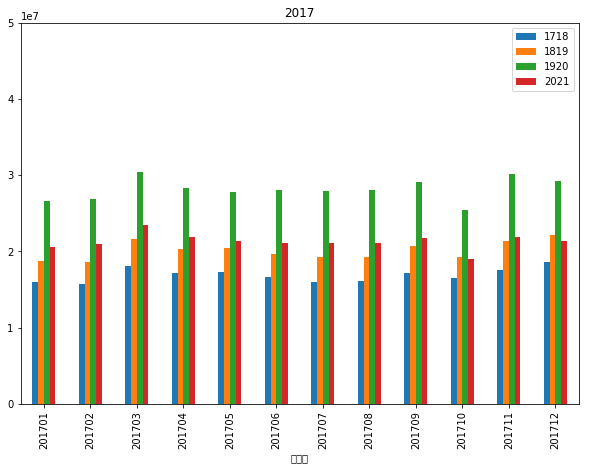

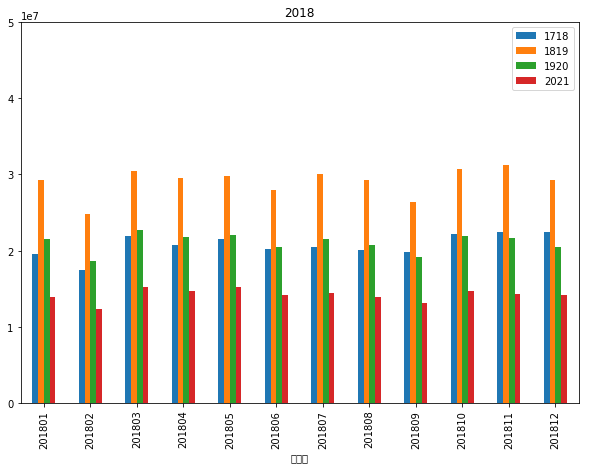

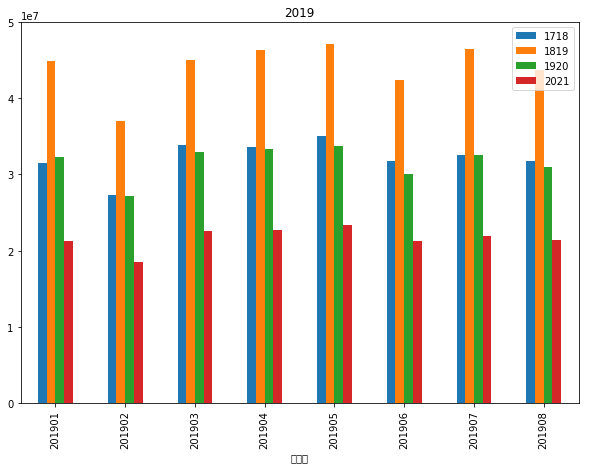

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

df_final = df_201789[df_201789['사용월'].str.contains('2017')].groupby('사용월').sum()
df_for_graph = df_final.iloc[:, -8: -4]

df_for_graph.plot.bar()
axes = plt.axes()
axes.set_ylim(0, 50000000)
axes.title.set_text('2017')
plt.gcf().set_size_inches(10, 7)


df_final = df_201789[df_201789['사용월'].str.contains('2018')].groupby('사용월').sum()
df_for_graph = df_final.iloc[:, -8: -4]

df_for_graph.plot.bar()
axes = plt.axes()
axes.set_ylim(0, 50000000)
axes.title.set_text('2018')
plt.gcf().set_size_inches(10, 7)


df_final = df_201789[df_201789['사용월'].str.contains('2019')].groupby('사용월').sum()
df_for_graph = df_final.iloc[:, -8: -4]

df_for_graph.plot.bar()
axes = plt.axes()
axes.set_ylim(0, 50000000)
axes.title.set_text('2019')
plt.gcf().set_size_inches(10, 7)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

df_final = df_201789[df_201789['사용월'].str.contains('2018')].groupby('사용월').sum()
df_for_graph = df_final.iloc[:, -8:]

df_for_graph.plot.bar()
axes = plt.axes()
axes.set_ylim(0, 30000000)
axes.title.set_text('2018')
plt.gcf().set_size_inches(10, 7)


In [ ]:
seoul_y_m= results[column_names[:8]].groupby(['연월', '시간구분/기관']).sum()

In [ ]:
seoul_y_m.rename(columns = {'서울메트로_승차': 'seoulmetro_in', '서울메트로_하차': 'seoulmetro_out', '서울도시철도공사_승차' : 'seoulcity_in', '서울도시철도공사_하차':'seoulcity_out'}, inplace = True)

In [ ]:
seoul_y_m

compare_y_m = seoul_y_m.iloc[:, 2:4]

In [ ]:
df = compare_y_m.loc[('201610')]
df1 = compare_y_m.loc[('201611')]
df2 = compare_y_m.loc[('201612')]

df3 = compare_y_m.loc[('201810')]
df4 = compare_y_m.loc[('201811')]
df5 = compare_y_m.loc[('201812')]

In [ ]:

df.plot.bar()
axes = plt.axes()
axes.set_ylim(0, 12000000)
axes.title.set_text('201610')
plt.gcf().set_size_inches(10, 7)



df1.plot.bar()
axes = plt.axes()
axes.set_ylim(0, 12000000)
axes.title.set_text('201611')
plt.gcf().set_size_inches(10, 7)


df2.plot.bar()
axes = plt.axes()
axes.set_ylim(0, 12000000)
axes.title.set_text('201612')
plt.gcf().set_size_inches(10, 7)

df3.plot.bar()
axes = plt.axes()
axes.set_ylim(0, 12000000)
axes.title.set_text('201810')
plt.gcf().set_size_inches(10, 7)

df4.plot.bar()
axes = plt.axes()
axes.set_ylim(0, 12000000)
axes.title.set_text('201811')
plt.gcf().set_size_inches(10, 7)

df5.plot.bar()
axes = plt.axes()
axes.set_ylim(0, 12000000)
axes.title.set_text('201812')
plt.gcf().set_size_inches(10, 7)


# 서울 철도 인원 only

In [ ]:
seoul_metro = results[column_names[1:8]].groupby('시간구분/기관').sum()
seoul_metro.rename(columns = {'서울메트로_승차': 'seoulmetro_in', '서울메트로_하차': 'seoulmetro_out', '서울도시철도공사_승차' : 'seoulcity_in', '서울도시철도공사_하차':'seoulcity_out'}, inplace = True)

In [ ]:
compare_metro = seoul_metro.iloc[:,2:4]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

compare_metro.plot.bar()
plt.gcf().set_size_inches(20, 10)